In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics
!pip install torchvision torch
!pip install pycocotools
!pip install matplotlib opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

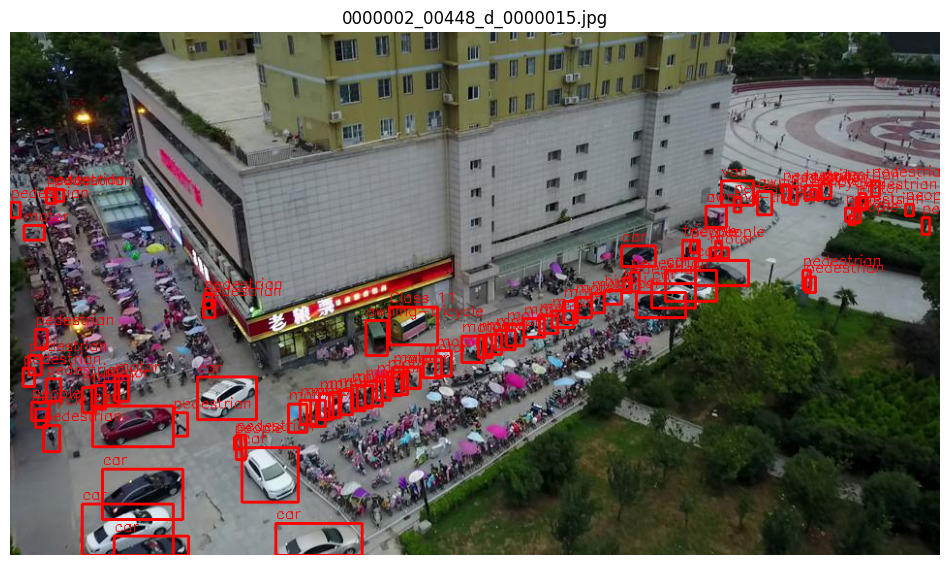

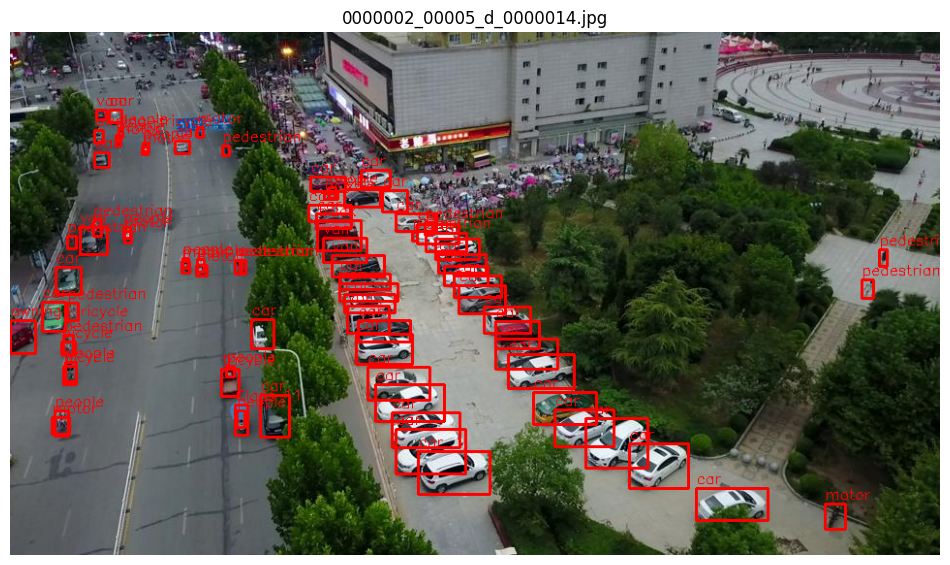

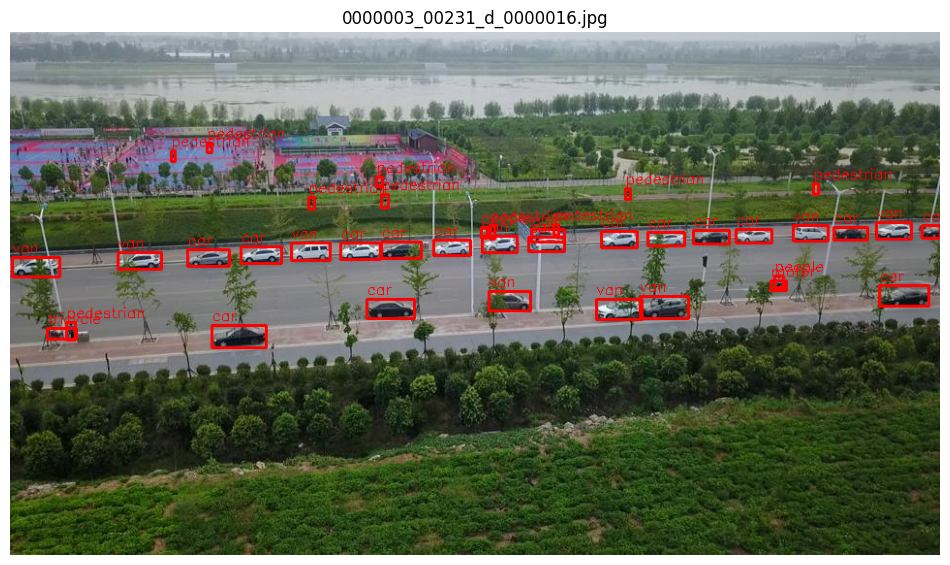

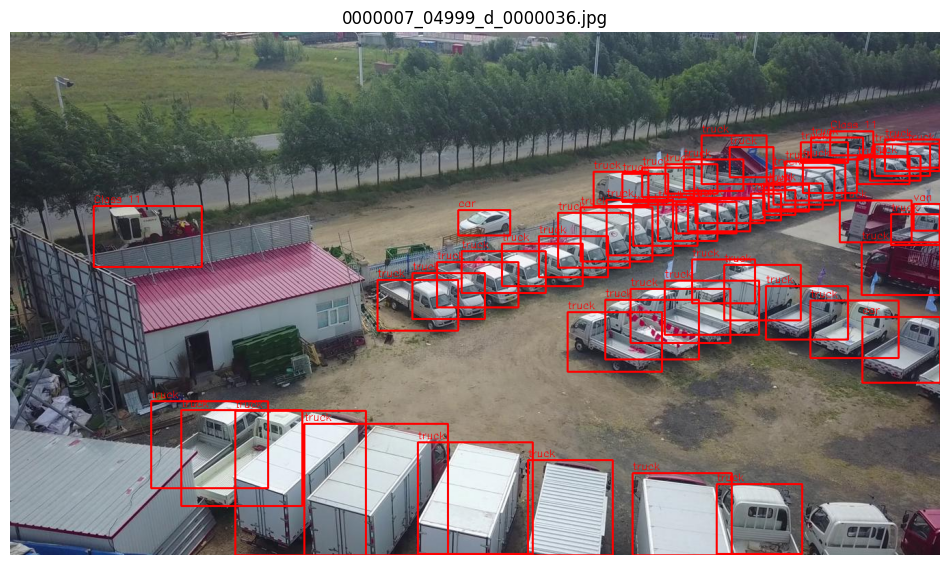

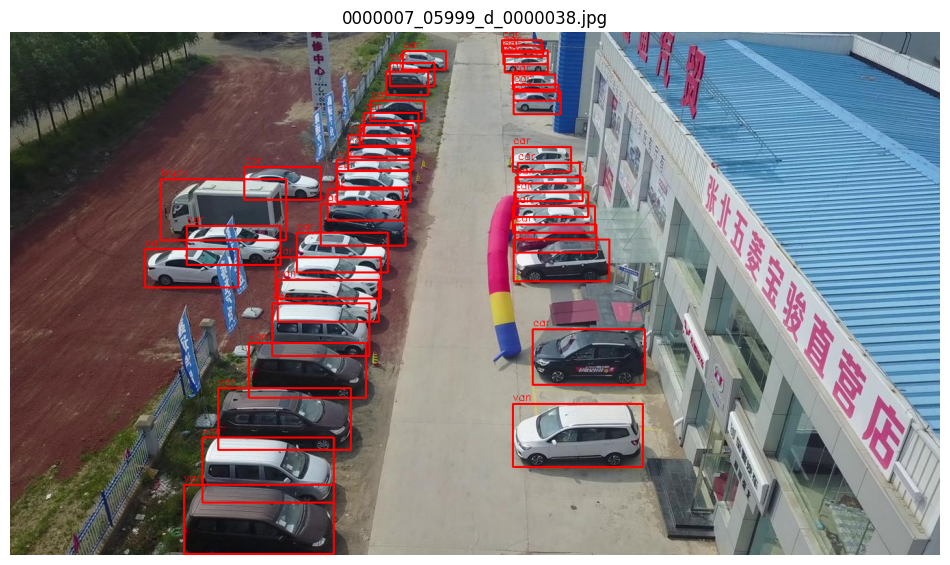

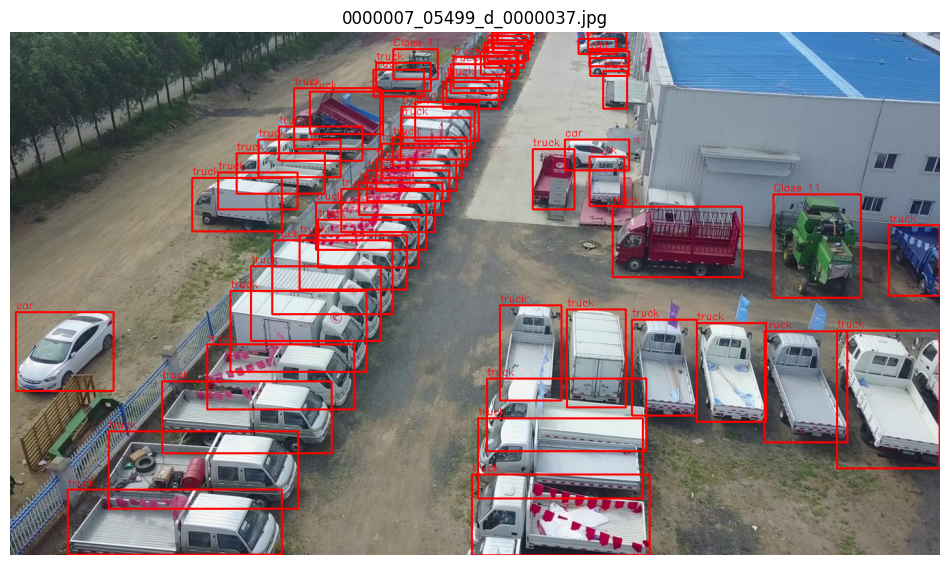

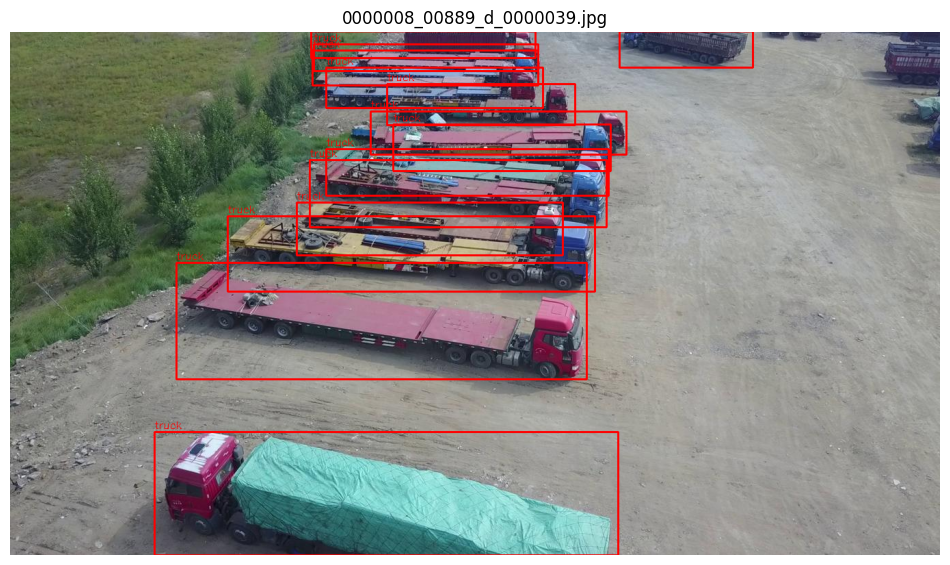

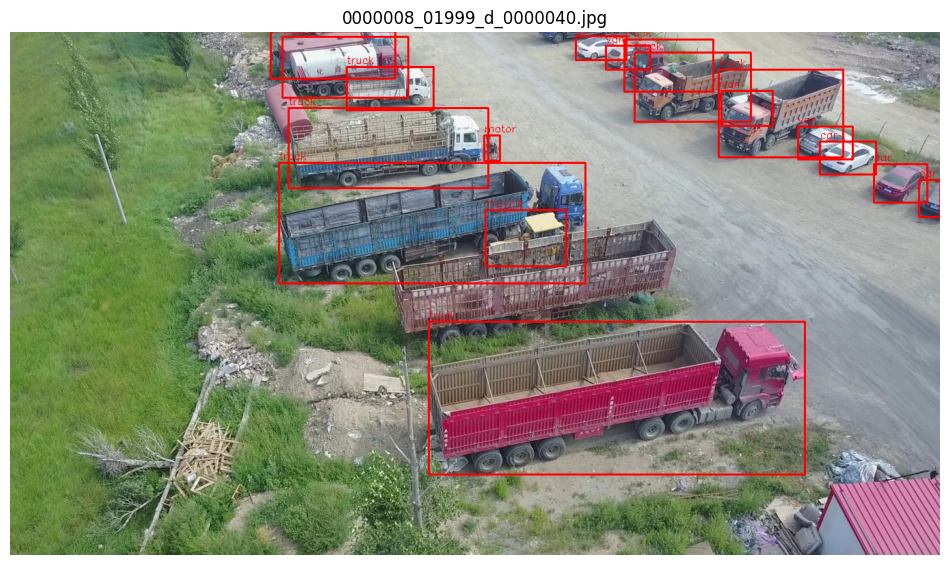


VisDrone Class Names:
0: ignored regions
1: pedestrian
2: people
3: bicycle
4: car
5: van
6: truck
7: tricycle
8: awning-tricycle
9: bus
10: motor


In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define paths to images and annotations
images_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/VisDrone-t/images'
annotations_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/VisDrone-t/annotations'

# Mapping class IDs to class names for visualization
class_names = {
    0: 'ignored regions',
    1: 'pedestrian',
    2: 'people',
    3: 'bicycle',
    4: 'car',
    5: 'van',
    6: 'truck',
    7: 'tricycle',
    8: 'awning-tricycle',
    9: 'bus',
    10: 'motor'
}

# Get the first 8 sample image names
sample_images = os.listdir(images_dir)[:8]

# Loop through each sample image
for img_name in sample_images:

    # Build full paths for the image and corresponding annotation file
    img_path = os.path.join(images_dir, img_name)
    ann_path = os.path.join(annotations_dir, img_name.replace('.jpg', '.txt'))

    # Read the image using OpenCV and convert from BGR to RGB for correct display
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # If annotation file exists, open and read it
    if os.path.exists(ann_path):
        with open(ann_path, 'r') as f:
            lines = f.readlines()

        # Parse each annotation line
        for line in lines:
            # Read bounding box and metadata from the annotation line
            x, y, w, h, score, class_id, truncation, occlusion = map(int, line.strip().split(','))

            # Skip ignored regions (class 0)
            if class_id == 0:
                continue

            # Draw bounding box in blue
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Draw class name above the bounding box
            class_name = class_names.get(class_id, f"Class {class_id}")
            cv2.putText(img, class_name, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image using matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
    plt.show()

# Print all class IDs with their names
print("\nVisDrone Class Names:")
for class_id, class_name in class_names.items():
    print(f"{class_id}: {class_name}")